<a href="https://colab.research.google.com/github/takaito1/EAS2655_S25/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dfA=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Atlanta_Mon_Temp.csv',na_values='M',index_col=0)
dfB=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Boston_Mon_Temp.csv',na_values='M',index_col=0)

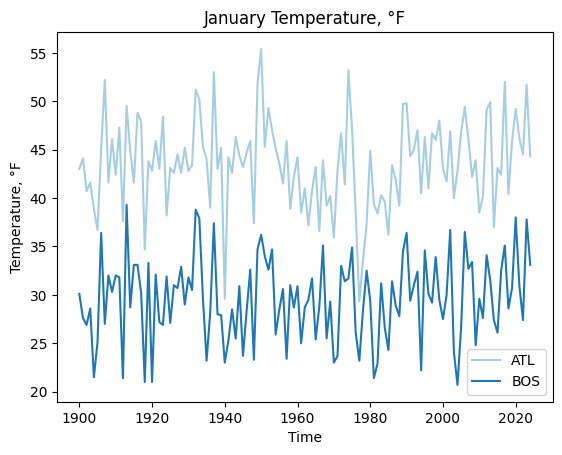

In [3]:
# Extract January temperature data for two locations from respective dataframes
A = dfA['JAN']  # Temperature data for location A (e.g., Atlanta)
B = dfB['JAN']  # Temperature data for location B (e.g., Boston)

# Get time index for plotting
time = dfA.index

# Define a colormap for consistent color selection
cmap = plt.get_cmap('Paired')

# Plot temperature data for Atlanta (ATL)
plt.plot(time, A, '-', color=cmap(0), label='ATL')

# Plot temperature data for Boston (BOS)
plt.plot(time, B, '-', color=cmap(1), label='BOS')

# Label x-axis as Time
plt.xlabel('Time')

# Label y-axis as Temperature in Fahrenheit
plt.ylabel('Temperature, °F')

# Add title to the plot
plt.title('January Temperature, °F')

# Display legend to differentiate the lines
plt.legend()

# Show the final plot
plt.show()

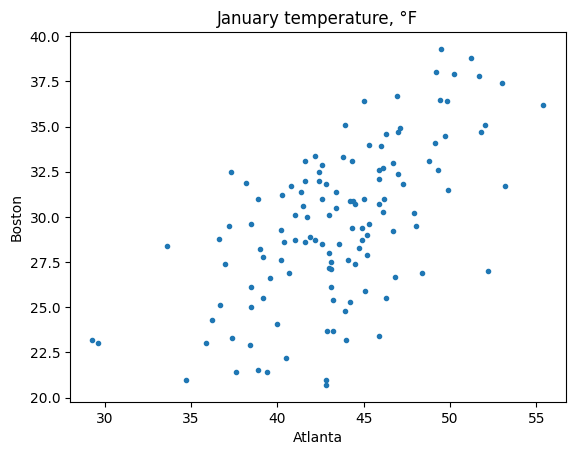

In [4]:
# Plot temperature data for Atlanta (x-axis) vs. Boston (y-axis) using dots ('.')
plt.plot(A, B, '.')

# Label x-axis as Atlanta's temperature
plt.xlabel('Atlanta')

# Label y-axis as Boston's temperature
plt.ylabel('Boston')

# Add title to the plot
plt.title('January Temperature, °F')

# Display the plot
plt.show()

In [5]:
# Function to remove linear trend from data
def detrend(data):
    # Get the number of data points
    N = np.size(data)

    # Create an array of indices from 0 to N-1
    x = np.arange(0, N, 1)

    # Center the data by subtracting the mean
    y = data - np.mean(data)

    # Compute the covariance matrix of x and y
    c = np.cov(x, y)

    # Return the detrended data by removing the linear trend component
    return y - x * (c[0,1] / c[0,0])

In [6]:
# Detrend the temperature data for Atlanta and Boston
Adt = detrend(A)  # Detrended data for Atlanta
Bdt = detrend(B)  # Detrended data for Boston

# Create a 2D array containing both detrended datasets
D = np.array([Adt, Bdt])

# Get the number of data points
N = np.size(Adt)

# Compute the covariance matrix of the detrended data
C = 1 / (N - 1) * D @ D.T  # Normalized by (N-1) for an unbiased estimate

In [7]:
# display covariance matrix
C

array([[21.34054158, 12.38336732],
       [12.38336732, 18.88918928]])

In [8]:
# calculate eigenvalue (L) and eigenvector (E) of the covariance matrix (C)
L, E = np.linalg.eig(C)

In [9]:
# display eigenvectors
E

array([[ 0.74111279, -0.67138055],
       [ 0.67138055,  0.74111279]])

In [10]:
# display eigenvalues
L

array([32.55874216,  7.6709887 ])

In [14]:
# Function to draw a vector using matplotlib
def draw_vector(vector):
    # Define the starting and ending points of the vector
    point = {'start': [0, 0], 'end': vector}

    # Draw an arrow representing the vector
    plt.annotate(
        '',  # No text annotation
        xy=point['end'],  # Endpoint of the vector
        xytext=point['start'],  # Start point of the vector
        arrowprops=dict(
            shrink=2,        # Slightly shrink the arrow size
            width=3,         # Set the width of the arrow shaft
            headlength=10,   # Define the length of the arrowhead
            connectionstyle='arc3'  # Set the arrow style for smooth curvature
        )
    )

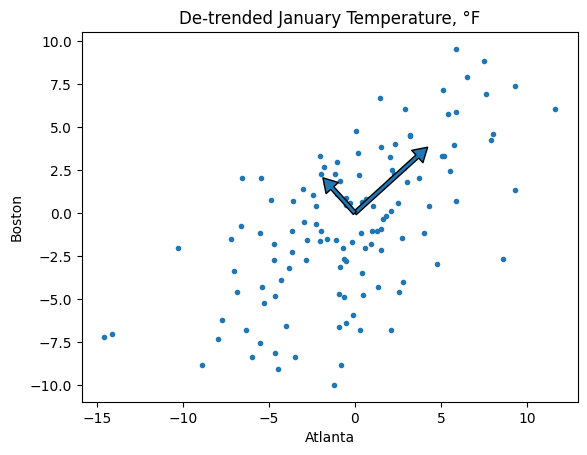

In [16]:
# Scatter plot of detrended January temperatures in Atlanta and Boston
plt.plot(Adt, Bdt, '.')

# Draw the first principal component vector, scaled by its eigenvalue
draw_vector(E[:, 0] * np.sqrt(L[0]))

# Draw the second principal component vector, scaled by its eigenvalue
draw_vector(E[:, 1] * np.sqrt(L[1]))

# Label x-axis as Atlanta's detrended temperature
plt.xlabel('Atlanta')

# Label y-axis as Boston's detrended temperature
plt.ylabel('Boston')

# Add title to indicate that data is detrended
plt.title('De-trended January Temperature, °F')

# Display the plot
plt.show()

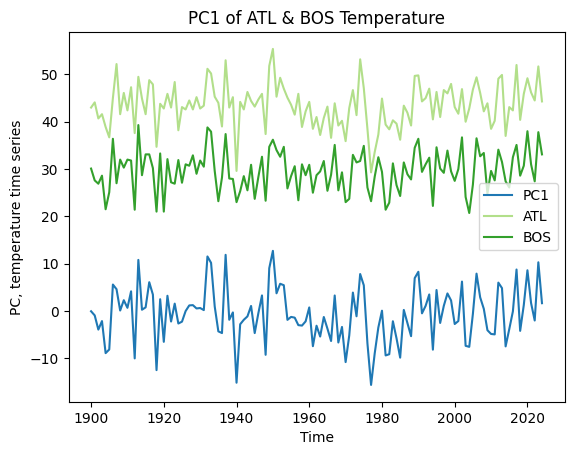

In [22]:
# Take inner product with the first eigenvector to compute the first principal component (PC1)
PC1 = E[:, 0] @ D  # Project data onto the first principal component

# Plot the first principal component time series
plt.plot(time, PC1, '-', color=cmap(1), label='PC1')

# Plot the original temperature data for Atlanta
plt.plot(time, A, '-', color=cmap(2), label='ATL')

# Plot the original temperature data for Boston
plt.plot(time, B, '-', color=cmap(3), label='BOS')

# Label x-axis as Time
plt.xlabel('Time')

# Label y-axis as Principal Component (PC) temperature time series
plt.ylabel('PC, temperature time series')

# Add title indicating that PC1 is extracted from ATL & BOS temperatures
plt.title('PC1 of ATL & BOS Temperature')

# Display legend to differentiate the plotted lines
plt.legend()

# Show the final plot
plt.show()

In [ ]:
EV1 = L[0]/np.sum(L)
print(f'Fraction of variance explained by PC1 = {EV1:.2g}')

Fraction of variance explained by PC1 = 0.81
